<a href="https://colab.research.google.com/github/fsluizvictor/linear-regression-one-variable/blob/main/linear_regression_one_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import files
uploaded = files.upload()

Saving data1.csv to data1 (4).csv


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [29]:
data = pd.read_csv('data1.csv',header=0,names=["Population","Gain"])

In [30]:
print(data)

    Population      Gain
0       5.5277   9.13020
1       8.5186  13.66200
2       7.0032  11.85400
3       5.8598   6.82330
4       8.3829  11.88600
..         ...       ...
91      5.8707   7.20290
92      5.3054   1.98690
93      8.2934   0.14454
94     13.3940   9.05510
95      5.4369   0.61705

[96 rows x 2 columns]


Plot dos dados:

Text(0, 0.5, 'Ganhos')

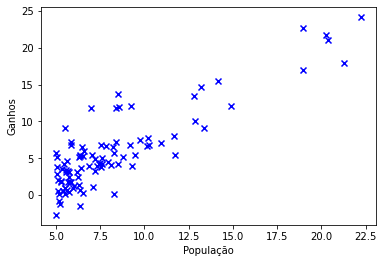

In [34]:
plt.scatter(data['Population'],data['Gain'],c='b',marker='x')
plt.xlabel('População')
plt.ylabel('Ganhos')

Execuntando o gradiente descendente: 

In [36]:
def prever(theta0, theta1, x_i):
    return theta1*x_i + theta0

In [37]:
def soma_erro_quadratico_medio(previsto, y):
    return np.array([(y_i - y_previsto) ** 2 for y_previsto, y_i in zip(previsto,y)]).mean()


In [38]:
def derivada(theta0, theta1, X, y):
    dtheta0 = 0
    dtheta1 = 0
    
    for x_i, y_i in zip(X, y):
        dtheta0 += prever(theta0, theta1, x_i) - y_i
        dtheta1 += (prever(theta0, theta1, x_i) - y_i)*x_i

    dtheta0 /= 0.5*len(X)
    dtheta1 /= 0.5*len(X)

    return dtheta0, dtheta1

In [39]:
def gradienteDescendente(theta0, theta1, X, y, alpha):
    dtheta0, dtheta1 = derivada(theta0, theta1, X, y)
    theta0 = theta0 - (alpha * dtheta0)
    theta1 = theta1 - (alpha * dtheta1)

    return theta0, theta1

In [56]:
def r_2(y_previsto, y):
    
    variancia_prevista = sum([(y[i] - y_previsto[i]) ** 2 for i in range(len(y))])
    variancia_original = sum([(y[i] - y.mean()) ** 2 for i in range(len(y))])
    
    return 1 - variancia_prevista / variancia_original

In [58]:
theta0 = random.random()
theta1 = random.random()

error_quadratico_medio = list()  
  
for i in range(1000):
    previstos = prever(theta0, theta1,data['Population'])
    error_quadratico_medio.append(soma_erro_quadratico_medio(previstos, data['Gain']))
    theta0, theta1 = gradienteDescendente(theta0, theta1, data['Population'], data['Gain'], 0.01)


Visualizando os resultados:

Text(0, 0.5, 'Ganhos')

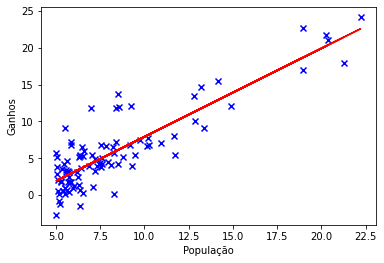

In [61]:
plt.scatter(data['Population'],data['Gain'],c='b',marker='x')
plt.plot(data['Population'],previstos,c='r')
plt.xlabel('População')
plt.ylabel('Ganhos')

Text(0, 0.5, 'Erro quadrático Médio')

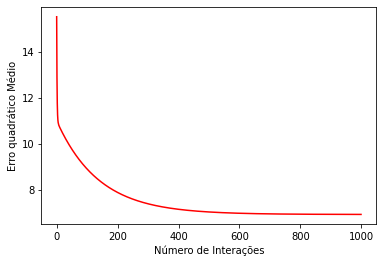

In [62]:
plt.plot(np.arange(1000),error_quadratico_medio,c='r')
plt.xlabel('Número de Interações')
plt.ylabel('Erro quadrático Médio')